In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv('wine.data')

In [23]:
col_names= ['Class','Alcohol','Malic Acid','Ash','Alcalinity of ash ','Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins','Color intensity','Hue','OD280/OD315 of diluted wines','Proline']
df.columns= col_names
df.to_csv('dataset.csv', index=False)

In [24]:
print(df.head())

   Class  Alcohol  Malic Acid   Ash  Alcalinity of ash   Magnesium  \
0      1    13.20        1.78  2.14                11.2        100   
1      1    13.16        2.36  2.67                18.6        101   
2      1    14.37        1.95  2.50                16.8        113   
3      1    13.24        2.59  2.87                21.0        118   
4      1    14.20        1.76  2.45                15.2        112   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.65        2.76                  0.26             1.28   
1           2.80        3.24                  0.30             2.81   
2           3.85        3.49                  0.24             2.18   
3           2.80        2.69                  0.39             1.82   
4           3.27        3.39                  0.34             1.97   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             4.38  1.05                          3.40     1050  
1             5.68  

In [25]:
df = pd.read_csv('dataset.csv')

In [26]:
null_counts = df.isnull().sum()
print(null_counts)

Class                           0
Alcohol                         0
Malic Acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [27]:
X = df.drop('Class', axis=1) 
y = df['Class']

In [28]:
Q1 = X.quantile(0.25) 
Q3 = X.quantile(0.75)  
IQR = Q3 - Q1          

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

X_no_outliers = X[~((X < lower_bound) | (X > upper_bound)).any(axis=1)]
y_no_outliers = y.loc[X_no_outliers.index]


In [29]:
print(X_no_outliers)

     Alcohol  Malic Acid   Ash  Alcalinity of ash   Magnesium  Total phenols  \
0      13.20        1.78  2.14                11.2        100           2.65   
1      13.16        2.36  2.67                18.6        101           2.80   
2      14.37        1.95  2.50                16.8        113           3.85   
3      13.24        2.59  2.87                21.0        118           2.80   
4      14.20        1.76  2.45                15.2        112           3.27   
..       ...         ...   ...                 ...        ...            ...   
171    14.16        2.51  2.48                20.0         91           1.68   
173    13.40        3.91  2.48                23.0        102           1.80   
174    13.27        4.28  2.26                20.0        120           1.59   
175    13.17        2.59  2.37                20.0        120           1.65   
176    14.13        4.10  2.74                24.5         96           2.05   

     Flavanoids  Nonflavanoid phenols  

In [30]:
print(y_no_outliers)

0      1
1      1
2      1
3      1
4      1
      ..
171    3
173    3
174    3
175    3
176    3
Name: Class, Length: 161, dtype: int64


In [31]:
num_rows = len(X_no_outliers)
print(f"Number of rows: {num_rows}")

Number of rows: 161


In [32]:
num_rows = len(y_no_outliers)
print(f"Number of rows: {num_rows}")

Number of rows: 161


In [33]:
X_train, X_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.25, random_state=42)

In [34]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [35]:
X_test_scaled = scaler.transform(X_test)

In [36]:
pca = PCA(n_components=0.95) 
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [37]:
k_values = range(1, 21)

In [38]:
accuracy_scores = []

In [39]:
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    cv_scores = cross_val_score(knn, X_train_pca, y_train, cv=5, scoring='accuracy')
    accuracy_scores.append(cv_scores.mean())

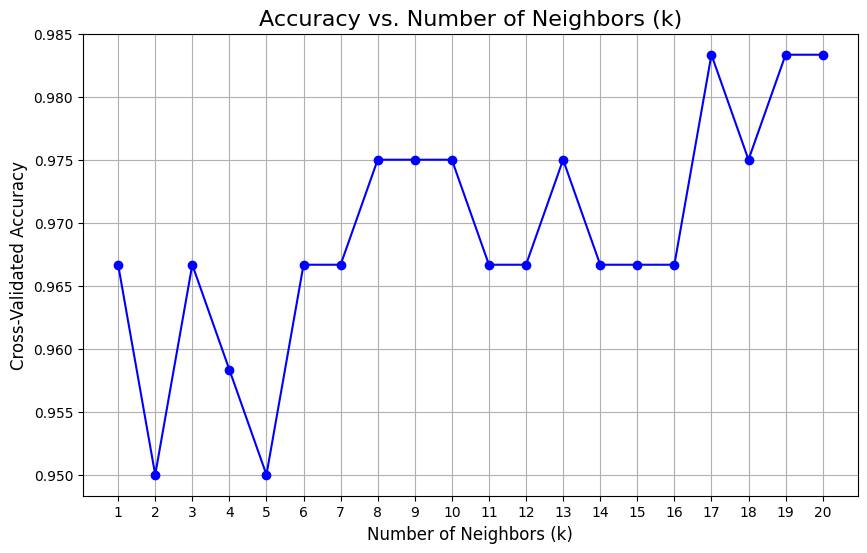

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors (k)', fontsize=16)
plt.xlabel('Number of Neighbors (k)', fontsize=12)
plt.ylabel('Cross-Validated Accuracy', fontsize=12)
plt.grid(True)
plt.xticks(k_values)
plt.show()

In [41]:
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

print(f"Best k value: {best_k}")
print(f"Best cross-validated accuracy: {best_accuracy * 100:.2f}%")

Best k value: 17
Best cross-validated accuracy: 98.33%
